<a href="https://colab.research.google.com/github/dylan-greenberg/Python-Projects-Labs/blob/main/Lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email

PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [ ]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import numpy as np

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/Labs/DataSets/superstore_retail_orders.csv')
df.head(20)

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
5,51319,2023-07-09,2023-07,Troy Rodriguez,South Brendamouth,Ohio,troy_rodriguez@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
6,51357,2023-07-11,2023-07,Natalie Phillips,Rachelburgh,Alabama,natalie_phillips@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
7,51371,2023-07-12,2023-07,Dalton Mitchell,Michaeltown,Virginia,dalton_mitchell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
8,51424,2023-07-15,2023-07,Timothy James,West Pamela,New York,timothy_james@email.com,Retail,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
9,51452,2023-07-17,2023-07,Fernando Scott,East Maureenbury,South Dakota,fernando_scott@email.com,Retail,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [ ]:
df.columns

Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'email', 'order_type', 'quantity', 'product_name',
       'product_line', 'product_price', 'product_status'],
      dtype='object')

In [ ]:
df['product_price'] = pd.to_numeric(df['product_price'])
df['quantity'] = pd.to_numeric(df['quantity'])
df['order_id'] = pd.to_numeric(df['order_id'])

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56043 entries, 0 to 56042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          56043 non-null  int64         
 1   order_date        55956 non-null  datetime64[ns]
 2   order_year_month  56011 non-null  object        
 3   customer_name     56043 non-null  object        
 4   city              55569 non-null  object        
 5   state_province    55569 non-null  object        
 6   email             56043 non-null  object        
 7   order_type        56043 non-null  object        
 8   quantity          56004 non-null  float64       
 9   product_name      56043 non-null  object        
 10  product_line      56043 non-null  object        
 11  product_price     56043 non-null  float64       
 12  product_status    56043 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,order_id,order_date,quantity,product_price
count,56043.000000,55956,56004.000000,56043.000000
mean,61668.410578,2023-11-10 20:59:29.890628096,3.348582,6198.309433
min,45079.000000,1922-06-28 00:00:00,1.000000,2.290000
25%,55644.500000,2023-10-06 00:00:00,1.000000,7.950000
50%,61870.000000,2024-01-10 00:00:00,1.000000,475.600000
75%,68097.000000,2024-04-11 00:00:00,2.000000,914.620000
max,74147.000000,2029-08-02 00:00:00,100000.000000,235481.000000
std,7508.142486,NaN,422.654112,35784.965255


In [ ]:
df_clean = df[(df['product_price'] < 5000) &
              (df['order_date'] > '2020-01-01') &
              (df['product_status'] == 'Active')]
df_clean['order_total'] = df_clean['product_price']*df_clean['quantity']
df_clean.describe()

<ipython-input-132-b94c2a9984dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_total'] = df_clean['product_price']*df_clean['quantity']


,order_id,order_date,quantity,product_price,order_total
count,52675.000000,52675,52637.000000,52675.000000,5.263700e+04
mean,61581.580978,2023-12-17 15:27:05.689606144,3.436157,638.216483,8.362847e+02
min,45079.000000,2022-01-01 00:00:00,1.000000,2.290000,2.290000e+00
25%,55559.500000,2023-10-05 00:00:00,1.000000,4.990000,1.497000e+01
50%,61799.000000,2024-01-10 00:00:00,1.000000,475.600000,4.756000e+02
75%,68034.000000,2024-04-11 00:00:00,2.000000,914.620000,1.097540e+03
max,74147.000000,2029-08-02 00:00:00,100000.000000,3578.270000,2.024994e+06
std,7542.343114,NaN,435.962505,824.165716,1.449471e+04


In [ ]:
df_clean['order_category'] = np.where(df_clean['order_type'] == 'retail', 1, 0)
df_clean.head(10)

<ipython-input-133-dc33c0de8254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_category'] = np.where(df_clean['order_type'] == 'retail', 1, 0)


,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,order_total,order_category
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,1949.97,0
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2599.96,0
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,3249.95,0
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0
5,51319,2023-07-09,2023-07,Troy Rodriguez,South Brendamouth,Ohio,troy_rodriguez@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0
6,51357,2023-07-11,2023-07,Natalie Phillips,Rachelburgh,Alabama,natalie_phillips@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0
7,51371,2023-07-12,2023-07,Dalton Mitchell,Michaeltown,Virginia,dalton_mitchell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0
8,51424,2023-07-15,2023-07,Timothy James,West Pamela,New York,timothy_james@email.com,Retail,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0
9,51452,2023-07-17,2023-07,Fernando Scott,East Maureenbury,South Dakota,fernando_scott@email.com,Retail,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0


In [ ]:
df_clean['season'] = np.where(df_clean['order_date'].dt.month.isin([12, 1, 2]), 'Winter',
                               np.where(df_clean['order_date'].dt.month.isin([3, 4, 5]), 'Spring',
                               np.where(df_clean['order_date'].dt.month.isin([6, 7, 8]), 'Summer', 'Fall')))
df_clean.head(10)

<ipython-input-134-129592d38dd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['season'] = np.where(df_clean['order_date'].dt.month.isin([12, 1, 2]), 'Winter',


,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,order_total,order_category,season
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,1949.97,0,Summer
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2599.96,0,Summer
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,3249.95,0,Summer
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer
5,51319,2023-07-09,2023-07,Troy Rodriguez,South Brendamouth,Ohio,troy_rodriguez@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer
6,51357,2023-07-11,2023-07,Natalie Phillips,Rachelburgh,Alabama,natalie_phillips@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer
7,51371,2023-07-12,2023-07,Dalton Mitchell,Michaeltown,Virginia,dalton_mitchell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer
8,51424,2023-07-15,2023-07,Timothy James,West Pamela,New York,timothy_james@email.com,Retail,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer
9,51452,2023-07-17,2023-07,Fernando Scott,East Maureenbury,South Dakota,fernando_scott@email.com,Retail,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer


In [ ]:
df_clean['product_line'].unique()

array(['Mobile', 'Bikes', 'Cameras', 'Electronics', 'Accessories',
       'Clothing', 'Projector', 'Laptop', 'OfficeProducts'], dtype=object)

In [ ]:
df_clean['region'] = np.where(df_clean['state_province'].isin(['California', 'Oregon', 'Washington', 'Nevada', 'Arizona', 'New Mexico', 'Utah', 'Colorado', 'Idaho', 'Montana', 'Wyoming', 'Alaska', 'Hawaii']), 'West Coast',
                              np.where(df_clean['state_province'].isin(['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Indiana', 'Michigan', 'Ohio']), 'Midwest',
                               np.where(df_clean['state_province'].isin(['Texas', 'Oklahoma', 'Arkansas', 'Lousiana', 'Mississippi', 'Alabama', 'Tennesee', 'Kentucky', 'West Virginia', 'Georgia', 'Florida', 'South Carolina', 'North Carolina', 'Virginia', 'DC']), 'South',
                                np.where(df_clean['state_province'].isin(['Deleware', 'Maryland', 'Pennsylvania', 'New Jersey', 'New York', 'Massachusetts', 'Rhode Island', 'Connecticut', 'Maine', 'Vermont', 'New Hampshire']), 'Northeast', 'Other'))))
df_clean.head(10)

<ipython-input-136-1dadef5e0468>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['region'] = np.where(df_clean['state_province'].isin(['California', 'Oregon', 'Washington', 'Nevada', 'Arizona', 'New Mexico', 'Utah', 'Colorado', 'Idaho', 'Montana', 'Wyoming', 'Alaska', 'Hawaii']), 'West Coast',


,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,order_total,order_category,season,region
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,1949.97,0,Summer,Northeast
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2599.96,0,Summer,South
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,3249.95,0,Summer,Midwest
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,Midwest
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,South
5,51319,2023-07-09,2023-07,Troy Rodriguez,South Brendamouth,Ohio,troy_rodriguez@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,Midwest
6,51357,2023-07-11,2023-07,Natalie Phillips,Rachelburgh,Alabama,natalie_phillips@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,South
7,51371,2023-07-12,2023-07,Dalton Mitchell,Michaeltown,Virginia,dalton_mitchell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,South
8,51424,2023-07-15,2023-07,Timothy James,West Pamela,New York,timothy_james@email.com,Retail,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,Northeast
9,51452,2023-07-17,2023-07,Fernando Scott,East Maureenbury,South Dakota,fernando_scott@email.com,Retail,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,Midwest


## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [ ]:
df_clean['complete_customer_info'] = np.where(df_clean['customer_name'].notnull() & df_clean['city'].notnull() & df_clean['state_province'].notnull() & df_clean['email'].notnull(),
                                                                                                                               1, 2)
df_clean.head(10)

<ipython-input-137-043a09664c32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['complete_customer_info'] = np.where(df_clean['customer_name'].notnull() & df_clean['city'].notnull() & df_clean['state_province'].notnull() & df_clean['email'].notnull(),


,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,order_total,order_category,season,region,complete_customer_info
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,1949.97,0,Summer,Northeast,1
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2599.96,0,Summer,South,1
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,3249.95,0,Summer,Midwest,1
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,Midwest,1
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,South,1
5,51319,2023-07-09,2023-07,Troy Rodriguez,South Brendamouth,Ohio,troy_rodriguez@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,Midwest,1
6,51357,2023-07-11,2023-07,Natalie Phillips,Rachelburgh,Alabama,natalie_phillips@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,South,1
7,51371,2023-07-12,2023-07,Dalton Mitchell,Michaeltown,Virginia,dalton_mitchell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,South,1
8,51424,2023-07-15,2023-07,Timothy James,West Pamela,New York,timothy_james@email.com,Retail,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,Northeast,1
9,51452,2023-07-17,2023-07,Fernando Scott,East Maureenbury,South Dakota,fernando_scott@email.com,Retail,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,Midwest,1


In [ ]:
unique_values = df_clean['complete_customer_info'].unique()
print(unique_values)

[1 2]


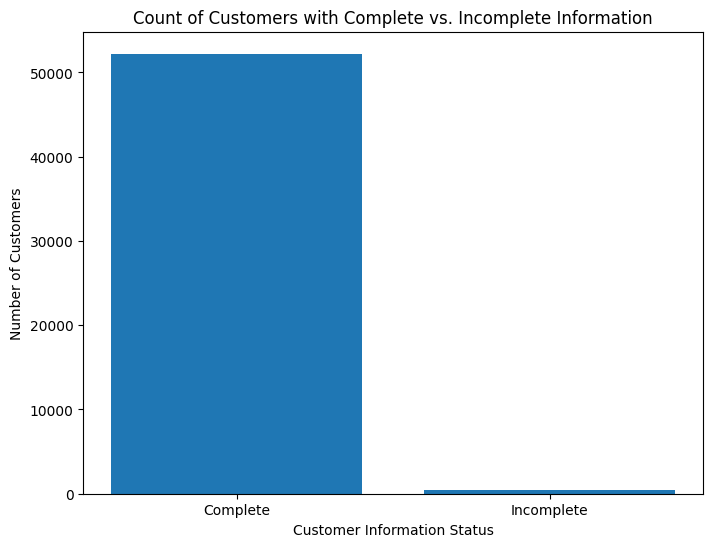

In [ ]:
# prompt: generate a bar chart to show complete_customer_info. 1 for complete 2 for incomplete

import matplotlib.pyplot as plt

# Assuming 'clean_df' is your DataFrame
complete_customer_counts = df_clean['complete_customer_info'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(complete_customer_counts.index, complete_customer_counts.values)
plt.xlabel('Customer Information Status')
plt.ylabel('Number of Customers')
plt.title('Count of Customers with Complete vs. Incomplete Information')
plt.xticks([1, 2], ['Complete', 'Incomplete'])
plt.show()


## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

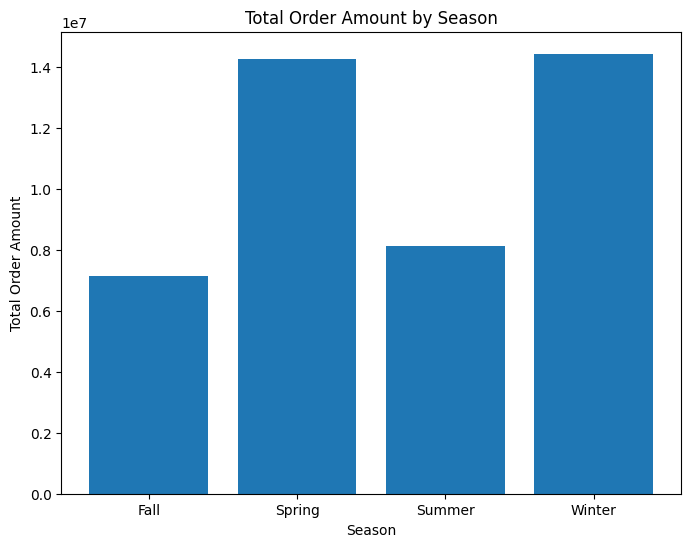

In [ ]:
# prompt: create a chart to show order_total by season

import matplotlib.pyplot as plt
# Group data by season and calculate total revenue
revenue_by_season = df_clean.groupby('season')['order_total'].sum()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(revenue_by_season.index, revenue_by_season.values)
plt.xlabel('Season')
plt.ylabel('Total Order Amount')
plt.title('Total Order Amount by Season')
plt.show()


In [ ]:
df_clean.describe()

,order_id,order_date,quantity,product_price,order_total,order_category,complete_customer_info
count,52675.000000,52675,52637.000000,52675.000000,5.263700e+04,52675.0,52675.000000
mean,61581.580978,2023-12-17 15:27:05.689606144,3.436157,638.216483,8.362847e+02,0.0,1.008505
min,45079.000000,2022-01-01 00:00:00,1.000000,2.290000,2.290000e+00,0.0,1.000000
25%,55559.500000,2023-10-05 00:00:00,1.000000,4.990000,1.497000e+01,0.0,1.000000
50%,61799.000000,2024-01-10 00:00:00,1.000000,475.600000,4.756000e+02,0.0,1.000000
75%,68034.000000,2024-04-11 00:00:00,2.000000,914.620000,1.097540e+03,0.0,1.000000
max,74147.000000,2029-08-02 00:00:00,100000.000000,3578.270000,2.024994e+06,0.0,2.000000
std,7542.343114,NaN,435.962505,824.165716,1.449471e+04,0.0,0.091830


<ipython-input-142-6231ad7c3bce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_year'] = df_clean['order_date'].dt.year


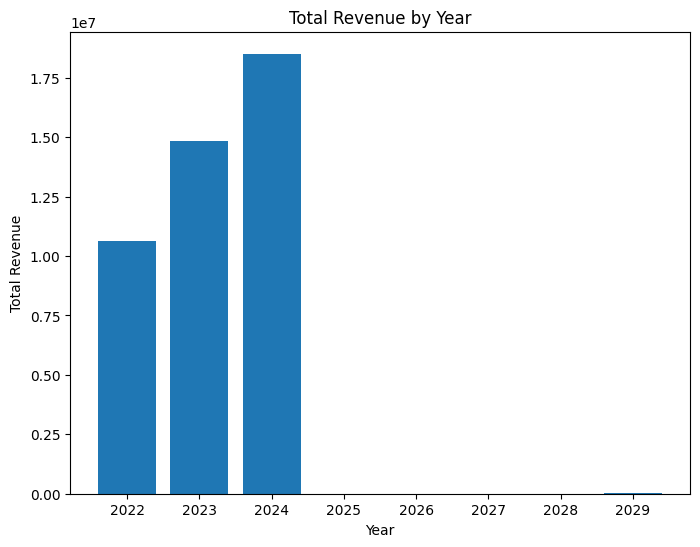

In [ ]:
# prompt: create a chart to show revenue for each year

import matplotlib.pyplot as plt
# Assuming 'df_clean' is your DataFrame
# Extract the year from the 'order_date' column
df_clean['order_year'] = df_clean['order_date'].dt.year

# Group data by year and calculate total revenue
revenue_by_year = df_clean.groupby('order_year')['order_total'].sum()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(revenue_by_year.index, revenue_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Year')
plt.show()


## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

In [ ]:
df_clean['product_line'].unique()

array(['Mobile', 'Bikes', 'Cameras', 'Electronics', 'Accessories',
       'Clothing', 'Projector', 'Laptop', 'OfficeProducts'], dtype=object)

In [ ]:
df_clean['product_line_type'] = np.where(df_clean['product_line'].isin(['Bikes', 'Clothing']), 'Outdoor', 'Indoor')
df_clean.head(10)

<ipython-input-154-382df1f46c44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['product_line_type'] = np.where(df_clean['product_line'].isin(['Bikes', 'Clothing']), 'Outdoor', 'Indoor')


,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,order_total,order_category,season,region,complete_customer_info,order_year,product_line_type
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,1949.97,0,Summer,Northeast,1,2023,Indoor
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2599.96,0,Summer,South,1,2023,Indoor
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,3249.95,0,Summer,Midwest,1,2023,Indoor
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,Midwest,1,2023,Indoor
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,South,1,2023,Indoor
5,51319,2023-07-09,2023-07,Troy Rodriguez,South Brendamouth,Ohio,troy_rodriguez@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,Midwest,1,2023,Indoor
6,51357,2023-07-11,2023-07,Natalie Phillips,Rachelburgh,Alabama,natalie_phillips@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,South,1,2023,Indoor
7,51371,2023-07-12,2023-07,Dalton Mitchell,Michaeltown,Virginia,dalton_mitchell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,South,1,2023,Indoor
8,51424,2023-07-15,2023-07,Timothy James,West Pamela,New York,timothy_james@email.com,Retail,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,Northeast,1,2023,Indoor
9,51452,2023-07-17,2023-07,Fernando Scott,East Maureenbury,South Dakota,fernando_scott@email.com,Retail,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,0,Summer,Midwest,1,2023,Indoor


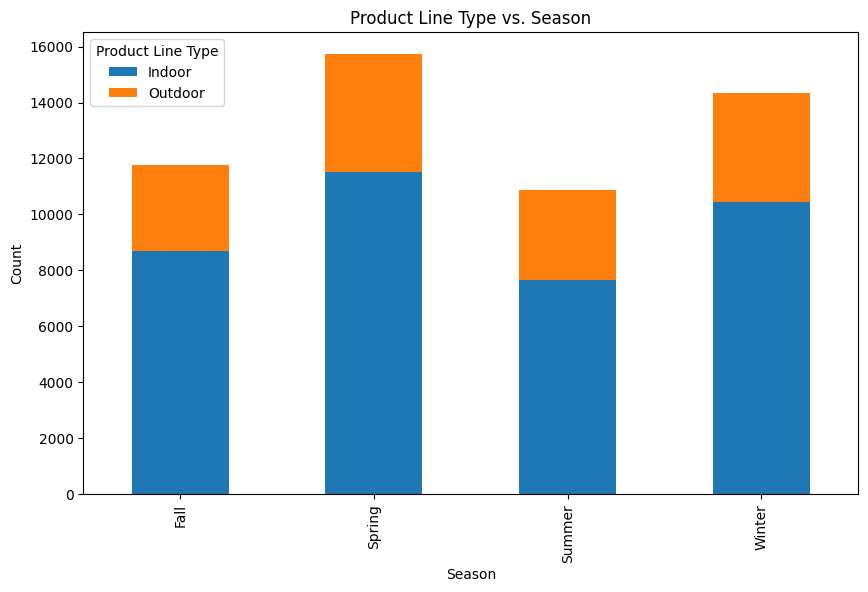

In [ ]:
pivot_table = pd.crosstab(df_clean['season'], df_clean['product_line_type'])

# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Product Line Type vs. Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Product Line Type')
plt.show()

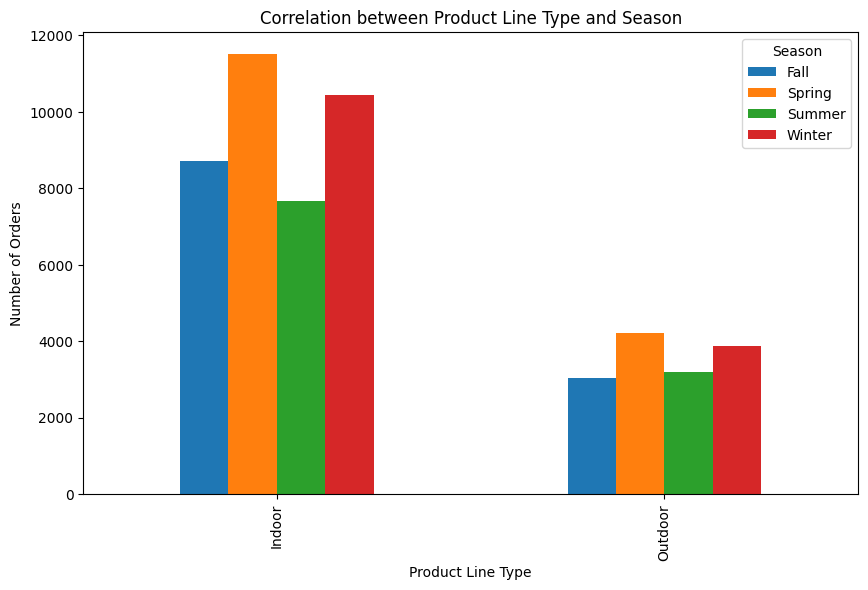

In [ ]:
# prompt: please create a graph that shows the correlation between product_lien_type and season

import matplotlib.pyplot as plt
# Group the data by product_line_type and season, then count the occurrences
product_season_counts = df_clean.groupby(['product_line_type', 'season'])['order_id'].count().unstack()

# Plot the correlation as a bar chart
product_season_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Correlation between Product Line Type and Season')
plt.xlabel('Product Line Type')
plt.ylabel('Number of Orders')
plt.legend(title='Season')
plt.show()
